In [241]:
'ADC to FFT carrier seat new approach'


'ADC to FFT carrier seat new approach'

# Loading the data

In [244]:
import gc
gc.collect()

3316

In [246]:
%reset -f

In [249]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [251]:
# Set directory containing CSV files
data_dir = r"D:\AIS & ML\realtime testing\testcarrier"

# Load all CSV files
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
dfs = [pd.read_csv(file, header=None) for file in csv_files]


In [252]:
# Combine all CSV data
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,2,1,512,0,1953125,12,0.0,0,...,6,5,6,9,7,7,10,14,16,14
1,64,32768,2,1,512,0,1953125,12,0.0,0,...,15,9,7,7,8,4,0,2,-1,-3
2,64,32768,2,1,512,0,1953125,12,0.0,0,...,23,21,18,14,11,7,9,8,7,5
3,64,32768,2,1,512,0,1953125,12,0.0,0,...,13,13,12,11,10,9,9,9,9,7
4,64,32768,2,1,512,0,1953125,12,0.0,0,...,7,6,5,2,1,-2,0,-3,-3,0
5,64,32768,2,1,512,0,1953125,12,0.0,0,...,3,5,6,-1,-1,1,-1,0,7,11
6,64,32768,2,1,512,0,1953125,12,0.0,0,...,2,-1,-2,0,-2,-3,-4,-7,-6,-2
7,64,32768,2,1,512,0,1953125,12,0.0,0,...,-4,-1,2,4,4,2,7,3,7,7
8,64,32768,2,1,512,0,1953125,12,0.0,0,...,12,14,15,16,14,13,16,21,22,17
9,64,32768,2,1,512,0,1953125,12,0.0,0,...,18,19,21,23,27,24,24,24,21,19


In [255]:
combined_df.shape

(10, 16400)

In [257]:
#remove headers
raw_data = combined_df.iloc[:, 16:]
raw_data

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,11,11,15,19,261,287,308,330,346,354,...,6,5,6,9,7,7,10,14,16,14
1,-4,-5,-162,-193,-220,-240,-258,-261,-261,-257,...,15,9,7,7,8,4,0,2,-1,-3
2,6,2,-1,-26,-71,-105,-141,-175,-202,-227,...,23,21,18,14,11,7,9,8,7,5
3,8,8,8,10,-255,-247,-237,-222,-201,-178,...,13,13,12,11,10,9,9,9,9,7
4,1,2,41,-2,-48,-87,-120,-157,-193,-220,...,7,6,5,2,1,-2,0,-3,-3,0
5,11,15,17,-157,-109,-57,2,55,110,163,...,3,5,6,-1,-1,1,-1,0,7,11
6,-2,-4,-1,-2,-246,-230,-215,-193,-168,-143,...,2,-1,-2,0,-2,-3,-4,-7,-6,-2
7,11,10,7,4,-252,-208,-161,-115,-65,-11,...,-4,-1,2,4,4,2,7,3,7,7
8,19,19,20,185,175,165,152,141,132,117,...,12,14,15,16,14,13,16,21,22,17
9,20,18,16,16,343,10,8,7,5,8,...,18,19,21,23,27,24,24,24,21,19


In [259]:
adc_data = raw_data.values  # Extract ADC values (skip metadata columns)
adc_data
#print(f"Loaded data shape: {adc_data.shape}")  # Shape should be (num_samples, num_features)


array([[  11,   11,   15, ...,   14,   16,   14],
       [  -4,   -5, -162, ...,    2,   -1,   -3],
       [   6,    2,   -1, ...,    8,    7,    5],
       ...,
       [  11,   10,    7, ...,    3,    7,    7],
       [  19,   19,   20, ...,   21,   22,   17],
       [  20,   18,   16, ...,   24,   21,   19]], shape=(10, 16384))

In [261]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(signal, cutoff=30e3, fs=1e6, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

filtered_data = np.array([butter_lowpass_filter(row) for row in adc_data])
filtered_data

array([[ 28.54776031,  66.07204676, 102.63476557, ...,  11.84906727,
         12.53631606,  13.14180897],
       [-13.11241826, -41.28475139, -68.74446006, ...,   1.38356953,
          0.39927954,  -0.47865868],
       [ -0.75234597, -27.86917994, -54.64721044, ...,  10.22373361,
          9.2857661 ,   8.43994547],
       ...,
       [  1.20537595,   7.30344767,  14.33703903, ...,   3.76493297,
          4.12678551,   4.46601221],
       [ 20.09551504,  31.61729798,  42.97875855, ...,  16.76485394,
         17.11965445,  17.42028967],
       [ 21.9259714 ,  22.8361251 ,  23.68118998, ...,  20.86508464,
         20.75516336,  20.64093524]], shape=(10, 16384))

In [262]:
def calculate_snr(signal, noise):
    power_signal = np.mean(signal ** 2)
    power_noise = np.mean(noise ** 2)
    return 10 * np.log10(power_signal / power_noise)

snr_after = calculate_snr(filtered_data, adc_data - filtered_data)
print(f"SNR After Fixing: {snr_after:.2f} dB")

SNR After Fixing: 21.30 dB


In [266]:
# Select from the 17th column to the end
adc_data_selected_columns = filtered_data.mean(axis=1)  # Python uses 0-based indexing
adc_data_selected_columns

array([ 8.40316681, 11.13977205, 20.1660358 , 22.48037052,  8.9648895 ,
       10.48155543, 10.1625783 , 10.98855747, 13.22499661, 19.83718795])

# ADC to FFT Conversion

In [269]:
# Assuming `adc_data` is your pandas Series with ADC data
adc_array = adc_data_selected_columns # Convert the pandas Series to a numpy array

# Choose a window function - Hanning window in this case
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

# Frequency bins (assuming you know the sampling rate)
sampling_rate = 1953125  # Example: 1000 Hz, replace with your actual sampling rate
min_freq = 35000  # 35 kHz
max_freq = 45000  # 45 kHz

n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Filter frequencies within 35kHz - 45kHz
#valid_indices = (freq >= min_freq) & (freq <= max_freq)
#filtered_freqs = freq[valid_indices]
#filtered_magnitudes = magnitude[valid_indices]
#filtered_phase = phase[valid_indices]

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df.head()  # Display the first few rows of the DataFrame

,Frequency,FFT Magnitude,Phase
0,0.0,59.064738,0.000000
1,195312.5,32.437668,-2.494081
2,390625.0,10.159185,2.838300
3,585937.5,9.739952,1.170581
4,781250.0,7.762519,-0.769244


In [271]:
# Add a new column to the fft_magnitude DataFrame for the binary label
# Set the value to 1 for presence of an infant with a carriage
#For Empty vs carrier
#fft_df['Object_Presence'] = 1 # 1 for presence, 0 for absence 
#For Withbaby vs Withoutbaby
fft_df['Infant_Presence'] = 0 # 1 for presence, 0 for absence 
# Display the first few rows to verify the new column
fft_df.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.0,59.064738,0.000000,0
1,195312.5,32.437668,-2.494081,0
2,390625.0,10.159185,2.838300,0
3,585937.5,9.739952,1.170581,0
4,781250.0,7.762519,-0.769244,0


In [273]:
len(fft_df)

10

In [275]:
fft_df.tail()

,Frequency,FFT Magnitude,Phase,Infant_Presence
5,-976562.5,6.673439,-3.141593,0
6,-781250.0,7.762519,0.769244,0
7,-585937.5,9.739952,-1.170581,0
8,-390625.0,10.159185,-2.838300,0
9,-195312.5,32.437668,2.494081,0


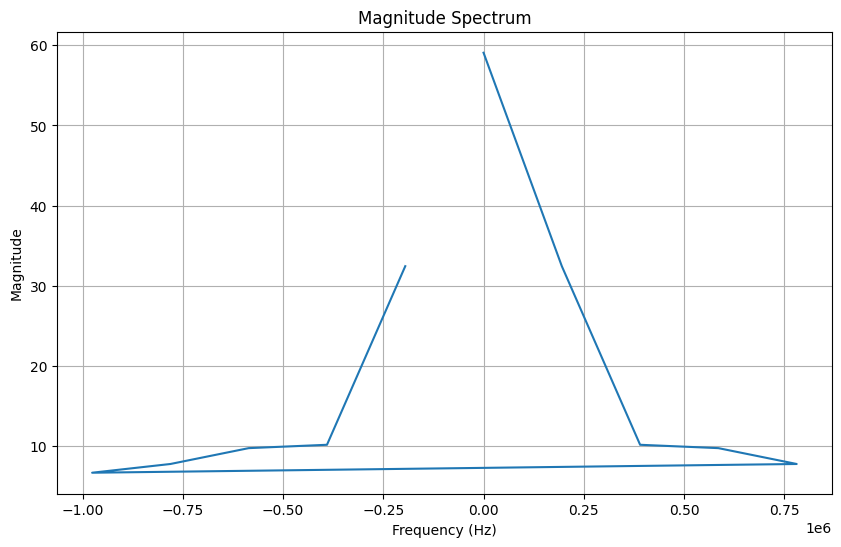

In [277]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

#  Saving to nump array

In [279]:
numpy_array = fft_df.to_numpy()
# Save the array to a file
np.save('demo_3.npy', numpy_array)

In [281]:
import gc
gc.collect()

14770

In [88]:
%reset -f